## import librariesabs

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## read data

In [2]:
data = pd.read_csv('data.txt', header=None, names=['Population', 'Profit'])

 #read data
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
#show data details
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<Axes: xlabel='Population', ylabel='Profit'>

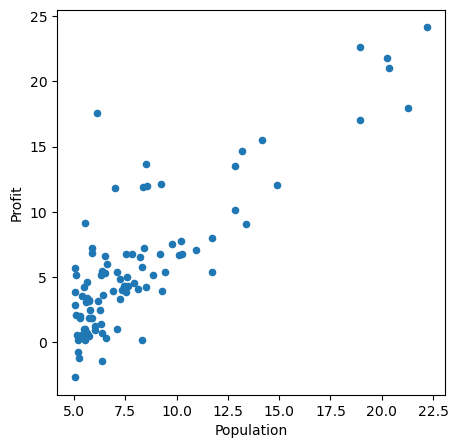

In [4]:
 #draw data
 data.plot(kind='scatter', x='Population', y='Profit', figsize=(5,5))

##  adding a new column called ones before the data

In [5]:
data.insert(0,'ones',1)
data.head()

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [6]:
 # separate X (training data) from y (target variable)
 cols = data.shape[1]
 X =data.iloc[:,0:cols-1]
 y = data.iloc[:,cols-1:cols]

 print('**************************************')
 print('X data = \n' ,X.head(10) )
 print('**************************************')
 print('y data = \n' ,y.head(10) )

**************************************
X data = 
    ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
5     1      8.3829
6     1      7.4764
7     1      8.5781
8     1      6.4862
9     1      5.0546
**************************************
y data = 
     Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233
5  11.8860
6   4.3483
7  12.0000
8   6.5987
9   3.8166


## convert from data frames to numpy matrices


In [7]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [8]:
 print('X \n',X[:3])
 print('X.shape = ' , X.shape)
 print('theta \n',theta)
 print('theta.shape = ' , theta.shape)
 print('y \n',y[:3])
 print('y.shape = ' , y.shape)
 print('**************************************')

X 
 [[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]]
X.shape =  (97, 2)
theta 
 [[0 0]]
theta.shape =  (1, 2)
y 
 [[17.592 ]
 [ 9.1302]
 [13.662 ]]
y.shape =  (97, 1)
**************************************


## cost function


In [9]:
def cost(X ,y ,theta):
    z = np.power(((X * theta.T))-y,2)
    m = len(X)
    #print(z)
    #print(m)
    return np.sum(z)/m           
    

In [10]:
cost(X,y,theta)

64.14546775491135

## gradientDescent function

In [11]:
def gradientDescent(X ,y ,theta ,alpha ,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parametar = int(theta.ravel().shape[1])
    costt = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T)-y

        for j in range(parametar):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))

        theta = temp
        costt[i] = cost(X,y,theta)

    return theta,costt

In [12]:
 # initialize variables for learning rate and iterations
 alpha= 0.01
 iters= 1000

 # perform gradient descent to "fit" the model parameters
 g, costt = gradientDescent(X, y, theta, alpha, iters)
 print('g = ' , g)
 print('cost = ' , costt[0:50] )
 print('computeCost = ' , cost(X, y, g))

g =  [[-3.24140214  1.1272942 ]]
cost =  [13.47438093 11.86318714 11.80230941 11.79045717 11.78018989 11.77000832
 11.75986496 11.74975819 11.73968782 11.72965373 11.71965578 11.70969384
 11.69976778 11.68987748 11.6800228  11.67020362 11.6604198  11.65067123
 11.64095777 11.6312793  11.62163569 11.61202681 11.60245254 11.59291276
 11.58340735 11.57393617 11.5644991  11.55509603 11.54572682 11.53639137
 11.52708954 11.51782121 11.50858627 11.49938459 11.49021606 11.48108055
 11.47197794 11.46290812 11.45387098 11.44486638 11.43589421 11.42695437
 11.41804672 11.40917116 11.40032757 11.39151584 11.38273584 11.37398747
 11.3652706  11.35658514]
computeCost =  9.031911006157827


## get best fit line

In [13]:
 x = np.linspace(data.Population.min(), data.Population.max(), 100)
 f = g[0, 0] + (g[0, 1] * (x))
 f

array([ 2.42539308,  2.62097407,  2.81655506,  3.01213605,  3.20771704,
        3.40329803,  3.59887902,  3.79446001,  3.990041  ,  4.18562199,
        4.38120298,  4.57678397,  4.77236495,  4.96794594,  5.16352693,
        5.35910792,  5.55468891,  5.7502699 ,  5.94585089,  6.14143188,
        6.33701287,  6.53259386,  6.72817485,  6.92375584,  7.11933683,
        7.31491782,  7.51049881,  7.7060798 ,  7.90166079,  8.09724177,
        8.29282276,  8.48840375,  8.68398474,  8.87956573,  9.07514672,
        9.27072771,  9.4663087 ,  9.66188969,  9.85747068, 10.05305167,
       10.24863266, 10.44421365, 10.63979464, 10.83537563, 11.03095662,
       11.2265376 , 11.42211859, 11.61769958, 11.81328057, 12.00886156,
       12.20444255, 12.40002354, 12.59560453, 12.79118552, 12.98676651,
       13.1823475 , 13.37792849, 13.57350948, 13.76909047, 13.96467146,
       14.16025245, 14.35583344, 14.55141442, 14.74699541, 14.9425764 ,
       15.13815739, 15.33373838, 15.52931937, 15.72490036, 15.92

 ## draw the line

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

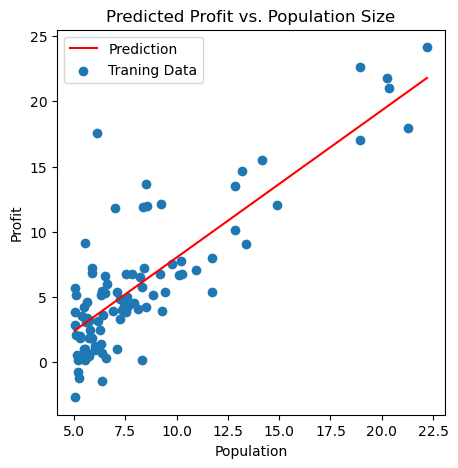

In [14]:
 fig, ax = plt.subplots(figsize=(5,5))
 ax.plot(x, f, 'r', label='Prediction')
 ax.scatter(data.Population, data.Profit, label='Traning Data')
 ax.legend(loc=2)
 ax.set_xlabel('Population')
 ax.set_ylabel('Profit')
 ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

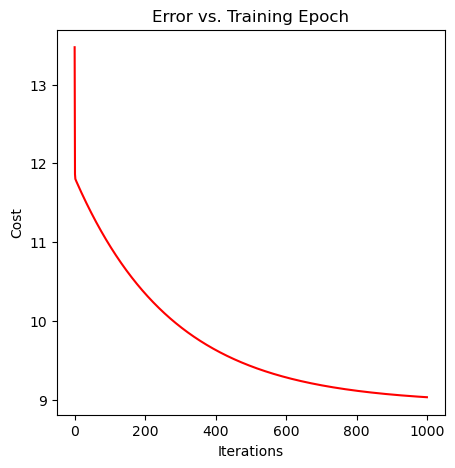

In [15]:
 # draw error graph
 fig, ax = plt.subplots(figsize=(5,5))
 ax.plot(np.arange(iters), costt, 'r')
 ax.set_xlabel('Iterations')
 ax.set_ylabel('Cost')
 ax.set_title('Error vs. Training Epoch')